# Import the Dependencies

In [1]:
import pandas as pd
import numpy as np
import operator
import pycountry_convert as pc
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

init_notebook_mode(connected=True)

**NOTE:** Since mostly I'm using plotly package. we can zoom on graphs for better visualisation.

### Loading Global Data

In [2]:
Global_data = pd.read_csv(r"csse_daily.csv")    
Global_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-07-13 04:43:04,34.223334,-82.461707,153,1,0,152.0,"Abbeville, South Carolina, US",623.802340,0.653595
1,22001.0,Acadia,Louisiana,US,2020-07-13 04:43:04,30.295065,-92.414197,1339,45,0,1294.0,"Acadia, Louisiana, US",2158.111048,3.360717
2,51001.0,Accomack,Virginia,US,2020-07-13 04:43:04,37.767072,-75.632346,1042,14,0,1028.0,"Accomack, Virginia, US",3224.408962,1.343570
3,16001.0,Ada,Idaho,US,2020-07-13 04:43:04,43.452658,-116.241552,4146,25,0,4121.0,"Ada, Idaho, US",860.903637,0.602991
4,19001.0,Adair,Iowa,US,2020-07-13 04:43:04,41.330756,-94.471059,17,0,0,17.0,"Adair, Iowa, US",237.695749,0.000000


In [3]:
print(f"Number of rows is {Global_data.shape[0]}. \nNumber of columns is {Global_data.shape[1]}.")

Number of rows is 3813. 
Number of columns is 14.


In [4]:
# Name of columns
Global_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [5]:
# Renaming column names
Global_data.rename(columns={"Country_Region" : "Country", "Long_": "Long" ,"Incidence_Rate" : "Incidence Rate" , 
                              'Case-Fatality_Ratio' : "Mortality Rate" }, inplace=True)

# Analysis of Global Cases

In [6]:
df_global = Global_data.copy().drop(['FIPS', 'Admin2', 'Province_State', 'Country', 'Last_Update','Lat', 'Long',
                                  'Combined_Key', 'Incidence Rate', "Mortality Rate"],axis=1)

In [7]:
total_global = df_global.sum()
total_global

Confirmed    12910357.0
Deaths         569128.0
Recovered     7116957.0
Active        5269635.0
dtype: float64

## Function for Pie Chart and Bar Graph

In [8]:
def pie_chart(labels,values,title):
    data = go.Pie(labels = labels,  values=values,
               hoverinfo='label+value+percent', textinfo='label+value', 
               textposition='inside',
               marker=dict(line=dict(color='#000000', width=1)), hole = 0.2)
    layout = go.Layout(title=title)
    fig = go.Figure(data = data , layout = layout)
    iplot(fig)

In [9]:
def single_bar_graph(x,y,color,title):
    bar_plot = go.Bar( x = x,  y = y, marker_color = color)
    layout = go.Layout( title = title)
    fig = go.Figure(data = bar_plot , layout = layout)
    iplot(fig)

### Graph 1: for  Global Cases

In [10]:
labels = total_global.index
values = total_global.values

In [11]:
pie_chart(labels[1:],values[1:],'Total Cases of Covid-19 (Global)') 

In [12]:
single_bar_graph(labels,values,"rgb(255,128,0)","Global Cases of Covid-19")

In [13]:
global_recovery_rate = (total_global[2]/total_global[0])*100
CFR = (total_global[1]/total_global[0])*100

### Graph 2:  for Recovery and Mortality Rates (Globally)

In [14]:
single_bar_graph(["Recovery Rate","Mortality Rate"], [global_recovery_rate,CFR], "rgb(204,0,102)", 
                 "Recovery and Mortality Rate (Globally)")

# Country Wise Analysis

**Data Preprocessing**

In [15]:
# Number of unique countries
print(f"Number of unique countries in this data is {Global_data['Country'].nunique()}.")

Number of unique countries in this data is 188.


This means in 3813 rows only 188  are unique country.

In [16]:
print("Name of the all unique countries are:")
Global_data['Country'].unique()

Name of the all unique countries are:


array(['US', 'Italy', 'Brazil', 'Russia', 'Mexico', 'Japan', 'Canada',
       'Colombia', 'Peru', 'Spain', 'India', 'United Kingdom', 'China',
       'Chile', 'Netherlands', 'Australia', 'Pakistan', 'Germany',
       'Sweden', 'Ukraine', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Diamond Princess', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritre

There are some country names which are not correct like "US", "South,Korea" , "Taiwn*" , etc

countries = name of all countries of data set
invalid_country_name = []

for country in countries:
    if country not in pc.WIKIPEDIA_COUNTRY_NAME_TO_COUNTRY_ALPHA2.keys():
        invalid_country_name.append(country)

In [17]:
# Get the country names which not in pycountry_convert library
countries = Global_data["Country"]
invalid_country_names = set([country for country in countries if country not in pc.WIKIPEDIA_COUNTRY_NAME_TO_COUNTRY_ALPHA2.keys()])
invalid_country_names

{'Burma',
 'Cabo Verde',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Eswatini',
 'Holy See',
 'Korea, South',
 'Kosovo',
 'MS Zaandam',
 'North Macedonia',
 'Sao Tome and Principe',
 'Taiwan*',
 'Timor-Leste',
 'US',
 'West Bank and Gaza',
 'Western Sahara'}

In [18]:
# Renaming Invalid Country names

Global_data.loc[Global_data['Country'] == "US", "Country"] = "USA"
Global_data.loc[Global_data['Country'] == "Burma", "Country"] = "Myanmar"
Global_data.loc[Global_data['Country'] == "Korea, South", "Country"] = "South Korea"
Global_data.loc[Global_data['Country'] == "Taiwan*", "Country"] = "Taiwan"
Global_data.loc[Global_data['Country'] == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
Global_data.loc[Global_data['Country'] == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
Global_data.loc[Global_data['Country'] == "Reunion", "Country"] = "Réunion"
Global_data.loc[Global_data['Country'] == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
Global_data.loc[Global_data['Country'] == "Bahamas, The", "Country"] = "Bahamas"
Global_data.loc[Global_data['Country'] == "Gambia, The", "Country"] = "Gambia"

In [19]:
# Grouping Data according to Countries
df_country_wise = Global_data.copy().drop(['FIPS','Admin2', 'Province_State', 'Last_Update','Combined_Key',"Lat", "Long","Mortality Rate","Incidence Rate"], axis=1).groupby(["Country"]).sum()

In [20]:
df_country_wise.head()

,Confirmed,Deaths,Recovered,Active
Country,,,,
Afghanistan,34451,1010,21216,12225.0
Albania,3454,93,1946,1415.0
Algeria,19195,1011,13743,4441.0
Andorra,855,52,803,0.0
Angola,506,26,118,362.0


In [21]:
# Adding Mortality and Recovery Rates
df_country_wise["Recovery Rate"] = (df_country_wise["Recovered"]/df_country_wise["Confirmed"])*100
df_country_wise["Mortality Rate"] = (df_country_wise["Deaths"]/df_country_wise["Confirmed"])*100

In [22]:
sorted_df = df_country_wise.sort_values(by='Confirmed', ascending=False)
sorted_df.style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
Country,,,,,,
USA,3304942,135205,1006326,2208772.000000,30.449127,4.090995
Brazil,1864681,72100,1264843,527738.000000,67.831602,3.866613
India,878254,23174,553471,301609.000000,63.019468,2.638644
Russia,726036,11318,500208,214510.000000,68.895757,1.558876
Peru,326326,11870,217111,97345.000000,66.531934,3.637467
Chile,315041,6979,283902,24160.000000,90.115890,2.215267
Mexico,299750,35006,234905,29839.000000,78.366972,11.678399
United Kingdom,291154,44904,1378,244872.000000,0.473289,15.422766
South Africa,276242,4079,134874,137289.000000,48.824581,1.476604


### Graph 3: for all countries confirmed, active, recovered and deaths cases

In [23]:
# Plotted using plotly package. We can zoom in the plot to visualize the data properly
confirmed = go.Bar( x = df_country_wise.index,  y = df_country_wise['Confirmed'],  name='Confirmed Cases', 
                   marker_color="rgb(204,0,0)" )

recovered = go.Bar( x = df_country_wise.index,  y = df_country_wise['Recovered'],  name='Recovered Cases', 
                   marker_color="rgb(51,102,0)")

active = go.Bar( x = df_country_wise.index,  y = df_country_wise['Active'],  name='Active Cases', 
                marker_color="rgb(0,0,102)")

death = go.Bar( x = df_country_wise.index,  y = df_country_wise['Deaths'], name='Death Cases', 
               marker_color="rgb(0,0,0)")

data = [confirmed,active,recovered,death]
layout = go.Layout(barmode='group', paper_bgcolor='rgb(255,255,255)', plot_bgcolor='rgb(255,255,255)')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

Clearly there are 188 countries in Data. Among them there are many countries which has very less confirmed case compared to laregest number of confirmed cases. So we ignore them for this part of Analysis.
We will do analysis by taking top countries whose number of cases are more than 1 million.

In [24]:
top_country_confirm_wise = df_country_wise.nlargest(30, "Confirmed")
top_country_confirm_wise.head()

,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
Country,,,,,,
USA,3304942,135205,1006326,2208772.0,30.449127,4.090995
Brazil,1864681,72100,1264843,527738.0,67.831602,3.866613
India,878254,23174,553471,301609.0,63.019468,2.638644
Russia,726036,11318,500208,214510.0,68.895757,1.558876
Peru,326326,11870,217111,97345.0,66.531934,3.637467


### Graph 4: for Top 30 Countries confirmed, active, recovered and deaths cases

In [25]:
confirmed = go.Bar( x = top_country_confirm_wise.index, y = top_country_confirm_wise['Confirmed'], name= 'Confirmed Cases')

recovered = go.Bar( x = top_country_confirm_wise.index,  y = top_country_confirm_wise['Recovered'], name= 'Recovered Cases')

active = go.Bar( x = top_country_confirm_wise.index,   y = top_country_confirm_wise['Active'],   name= 'Active Cases')

death = go.Bar( x = top_country_confirm_wise.index,  y = top_country_confirm_wise['Deaths'],   name= 'Deaths Cases')

data = [confirmed,active,recovered,death]
layout = go.Layout(title = "All Cases of 30 Coutntries", barmode='group')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [26]:
data=[ go.Bar( name="Confirmed Cases",
            x=top_country_confirm_wise.index,
            y=top_country_confirm_wise["Confirmed"],
            offsetgroup=0 ),
        go.Bar(  name="Recovered Cases",
            x=top_country_confirm_wise.index,
            y=top_country_confirm_wise["Recovered"],
            offsetgroup=0,
            base=top_country_confirm_wise["Confirmed"] ),
        go.Bar(   name="Active Cases",
            x=top_country_confirm_wise.index,
            y=top_country_confirm_wise["Active"],
            offsetgroup=0,
            base=top_country_confirm_wise["Confirmed"]),
        go.Bar(    name="Death Cases",
            x=top_country_confirm_wise.index,
            y=top_country_confirm_wise["Deaths"],
            offsetgroup=0,
            base=top_country_confirm_wise["Confirmed"] ) ]
layout=go.Layout( title="Top 30 Countries All Cases", yaxis_title="Number of Cases" ) 
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

### Graph 5: for top 30 Countries Total Cases

In [27]:
labels = top_country_confirm_wise.index
values = top_country_confirm_wise['Confirmed'].values
pie_chart(labels,values,"Top 30 Countries Total Cases")

In [28]:
single_bar_graph(labels, values, "rgb(128,128,128)", "Top 30 Countries Total Cases")

In [29]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country_wise.index,
    locationmode = 'country names',
    z = df_country_wise['Confirmed'],
    colorscale = 'Reds',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Confirmed Cases of 188 Countries',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

In [30]:
top_country_death_wise = df_country_wise.nlargest(30, "Deaths")
top_country_death_wise.head()

,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
Country,,,,,,
USA,3304942,135205,1006326,2208772.0,30.449127,4.090995
Brazil,1864681,72100,1264843,527738.0,67.831602,3.866613
United Kingdom,291154,44904,1378,244872.0,0.473289,15.422766
Mexico,299750,35006,234905,29839.0,78.366972,11.678399
Italy,243061,34954,194928,13179.0,80.197152,14.380752


### Graph 6: for Top 30 Countries Death Cases

In [31]:
pie_chart(top_country_death_wise.index, top_country_death_wise['Deaths'], "Death Cases of Top 30 Countries")

In [32]:
single_bar_graph(top_country_death_wise.index, top_country_death_wise['Deaths'] , "rgb(0,0,102)", 
                 "Death Cases of Top 30 Countries")

In [33]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country_wise.index,
    locationmode = 'country names',
    z = df_country_wise['Deaths'],
    colorscale = 'Blues',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Death Cases of 188 Countries ',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

Mortality Rate is connected with Death Cases. So now we display Mortality Rate 

### Graph 7:  All 188 countries Mortality Rate

In [34]:
top_country_MR_wise = df_country_wise.sort_values("Mortality Rate")

single_bar_graph(top_country_MR_wise.index, top_country_MR_wise['Mortality Rate'], 'rgb(0,0,255)',
                 "Mortality Rate of 188 countries (in %)")

In [35]:
top_country_recover_wise = df_country_wise.nlargest(30, "Recovered")
top_country_recover_wise.head()

,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
Country,,,,,,
Brazil,1864681,72100,1264843,527738.0,67.831602,3.866613
USA,3304942,135205,1006326,2208772.0,30.449127,4.090995
India,878254,23174,553471,301609.0,63.019468,2.638644
Russia,726036,11318,500208,214510.0,68.895757,1.558876
Chile,315041,6979,283902,24160.0,90.115890,2.215267


### Graph 8: for Top 30 countries Recovered Cases

In [36]:
pie_chart(top_country_recover_wise.index, top_country_recover_wise['Recovered'], "Recovered Cases of Top 30 Countries")

In [37]:
single_bar_graph( top_country_recover_wise.index, top_country_recover_wise['Recovered'], 'rgb(0,128,0)', 
                 "Recovered Cases of Top 30 Countries")

In [38]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country_wise.index,
    locationmode = 'country names',
    z = df_country_wise['Recovered'],
    colorscale = 'Greens',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Recovered Cases of 188 countries',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

### Graph 9: for Recovery Rate (Globally)

In [39]:
top_country_rr_wise = df_country_wise.sort_values("Recovery Rate",ascending=False)

single_bar_graph( top_country_rr_wise.index, top_country_rr_wise['Recovery Rate'], 'rgb(0,204,102)',
                 "Recovery Rate of 188 Countries (in %)")

In [40]:
top_country_active_wise = df_country_wise.nlargest(30, "Active")
top_country_active_wise.head()

,Confirmed,Deaths,Recovered,Active,Recovery Rate,Mortality Rate
Country,,,,,,
USA,3304942,135205,1006326,2208772.0,30.449127,4.090995
Brazil,1864681,72100,1264843,527738.0,67.831602,3.866613
India,878254,23174,553471,301609.0,63.019468,2.638644
United Kingdom,291154,44904,1378,244872.0,0.473289,15.422766
Russia,726036,11318,500208,214510.0,68.895757,1.558876


### Graph 10: for Top 30 Countries Active Cases

In [41]:
pie_chart(top_country_active_wise.index,  top_country_active_wise['Active'], "Active Cases of Top 30 Countries")

In [42]:
single_bar_graph( top_country_active_wise.index,  top_country_active_wise['Active'], 'rgb(204,0,102)',
                 "Active Cases of Top 30 Countries")

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations = df_country_wise.index,
    locationmode = 'country names',
    z = df_country_wise['Active'],
    colorscale = 'burg',
    marker_line_color = 'black',
    marker_line_width = 0.5,
))
fig.update_layout(
    title_text = 'Active Cases of 188 countries',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
        projection_type = 'equirectangular'
    )
)

## Top Country Specific Analysis

### Group 11: for Top 4 countries

In [44]:
df = top_country_confirm_wise.iloc[:,1:4]
labels = ["Deaths","Recovered","Active"]
colors = ['rgb(34, 53, 101)','rgb(36, 55, 57)', 'rgb(6, 4, 4)']

In [45]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
                    ,subplot_titles=['USA','Brazil','India','Russia'])

fig.add_trace(go.Pie(labels=labels, values=df.iloc[0].values, name="USA",scalegroup='one',marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=df.iloc[1].values, name="Brazil",scalegroup='one',marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=df.iloc[2].values, name="India",scalegroup='one',marker_colors=colors), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=df.iloc[3].values, name="Russia",scalegroup='one',marker_colors=colors), 2, 2)



fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig.show()


**Data Preprocessing for specific country**

In [46]:
Global_data.drop(['FIPS','Admin2','Last_Update','Lat','Long','Incidence Rate','Combined_Key','Mortality Rate'],axis=1,inplace=True)

In [47]:
Global_data.head(2)

,Province_State,Country,Confirmed,Deaths,Recovered,Active
0,South Carolina,USA,153,1,0,152.0
1,Louisiana,USA,1339,45,0,1294.0


In [48]:
# Function for Plotting countries with regional data

def plot_country_with_regions(country_name,case ,title,type_plot="bar",color="rgb(76,153,0)"):
    regions = list(Global_data[Global_data['Country']==country_name]['Province_State'].unique())
    t_cases = []
    no_cases = [] 
    for i in regions:
        cases = Global_data[Global_data['Province_State']==i][case].sum()
        if cases > 0:
            t_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, t_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        t_cases[i] = Global_data[Global_data['Province_State']==regions[i]][case].sum()  
    
    # for Top Five states:
    # additional province/state will be considered "others"
#     if(len(regions)>5):
#         regions_5 = regions[:5]
#         regions_5.append('Others')
#         t_cases_5 = t_cases[:5]
#         t_cases_5.append(np.sum(t_cases[5:]))
#         pie_chart(regions_5,t_cases_5, title)
#     else:
#         pie_chart(regions,t_cases, title)
    if type_plot == "pie":
        pie_chart(regions,t_cases,title)
    else:
        single_bar_graph(regions,t_cases,color,title)

### Graph 12: for Confirmed Cases of States of USA

In [49]:
plot_country_with_regions('USA', 'Confirmed','COVID-19 Confirmed Cases in the United States', "pie")

In [50]:
plot_country_with_regions('USA', 'Confirmed','COVID-19 Confirmed Cases in the United States')

### Graph 13: for Active Cases of States of USA

In [51]:
plot_country_with_regions('USA', 'Active','COVID-19 Active Cases in the United States',"pie")

In [52]:
plot_country_with_regions('USA', 'Active','COVID-19 Active Cases in the United States',color="rgb(204,204,0)")

### Graph 14: for Death Cases of States of USA

In [53]:
plot_country_with_regions('USA', 'Deaths','COVID-19 Death Cases in the United States',"pie")

In [54]:
plot_country_with_regions('USA', 'Deaths','COVID-19 Death Cases in the United States',color="rgb(0,128,255)")

### Graph 15: for Confirmed Cases of States of Brazil

In [55]:
plot_country_with_regions('Brazil', 'Confirmed','COVID-19 Confirmed Cases in the Brazil',"pie")

In [56]:
plot_country_with_regions('Brazil', 'Confirmed','COVID-19 Confirmed Cases in the Brazil',color="rgb(204,0,0)")

### Graph 16: for Recovered Cases of States of Brazil

In [57]:
plot_country_with_regions('Brazil', 'Recovered','COVID-19 Recovered Cases in the Brazil',"pie")

In [58]:
plot_country_with_regions('Brazil', 'Recovered','COVID-19 Recovered Cases in the Brazil',color="rgb(0,0,204)")

### Graph 17: for Death Cases of States of Brazil

In [59]:
plot_country_with_regions('Brazil', 'Deaths','COVID-19 Death Cases in the Brazil',"pie")

In [60]:
plot_country_with_regions('Brazil', 'Deaths','COVID-19 Death Cases in the Brazil',color="rgb(0,0,0)")

### Graph 18: for Confirmed Cases of States of India

In [61]:
plot_country_with_regions('India', 'Confirmed','COVID-19 Confirmed Cases in the India',"pie")

In [62]:
plot_country_with_regions('India', 'Confirmed','COVID-19 Confirmed Cases in the India',color="rgb(255,51,51)")

### Graph 19: for Active Cases of States of India

In [63]:
plot_country_with_regions('India', 'Active','COVID-19 Active Cases in the India',"pie")

In [64]:
plot_country_with_regions('India', 'Active','COVID-19 Active Cases in the India',color="rgb(153,0,76)")

### Graph 20: for Death Cases of States of India

In [65]:
plot_country_with_regions('India', 'Deaths','COVID-19 Death Cases in the India',"pie")

In [66]:
plot_country_with_regions('India', 'Deaths','COVID-19 Death Cases in the India',color="rgb(102,51,0)")

### Graph 21: for Confirm Cases of States of Russia

In [67]:
plot_country_with_regions('Russia', 'Confirmed','COVID-19 Confirmed Cases in the Russia',"pie")

In [68]:
plot_country_with_regions('Russia', 'Confirmed','COVID-19 Confirmed Cases in the Russia',color="rgb(0,0,102)")

### Graph 22: for Active Cases of States of Russia

In [69]:
plot_country_with_regions('Russia', 'Active','COVID-19 Active Cases in the Russia',"pie")

In [70]:

plot_country_with_regions('Russia', 'Active','COVID-19 Active Cases in the Russia',color="rgb(0,204,0)")

### Graph 23: for Death Cases of States of Russia

In [71]:
plot_country_with_regions('Russia', 'Deaths','COVID-19 Death Cases in the Russia',"pie")

In [72]:
plot_country_with_regions('Russia', 'Deaths','COVID-19 Death Cases in the Russia',color="rgb(255,102,102)")

# Continent Wise Analysis

**Data Preprocessing**

In [73]:
# Creating a new Continent column
countries = Global_data["Country"]

def country_to_continent_name(country):
    try:
        return pc.convert_continent_code_to_continent_name(pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country)))
    except:
        return np.nan
    
Continents = [country_to_continent_name(c) for c in countries]

In [74]:
# Insert the Continent named Column in data set at position 1
Global_data.insert(1, "Continent", Continents)

# Fill the nan value of Continent column with "Other" 
Global_data["Continent"].fillna("Other", inplace=True)

In [75]:
Global_data.head()

,Province_State,Continent,Country,Confirmed,Deaths,Recovered,Active
0,South Carolina,North America,USA,153,1,0,152.0
1,Louisiana,North America,USA,1339,45,0,1294.0
2,Virginia,North America,USA,1042,14,0,1028.0
3,Idaho,North America,USA,4146,25,0,4121.0
4,Iowa,North America,USA,17,0,0,17.0


In [76]:
## Continenet wise Analysis
continent_wise_df = Global_data.drop(["Province_State","Country"], axis=1).groupby(["Continent"]).sum().drop(["Other"])
continent_wise_df["Mortality_Rate"] =( continent_wise_df["Deaths"]/ continent_wise_df["Confirmed"])*100
continent_wise_df['Recovery Rate'] = ( continent_wise_df['Recovered']/continent_wise_df['Confirmed'] )*100

In [77]:
continent_wise_df

,Confirmed,Deaths,Recovered,Active,Mortality_Rate,Recovery Rate
Continent,,,,,,
Africa,594945,13245,295234,286466.0,2.226256,49.623747
Asia,2955690,70322,2049594,835774.0,2.379208,69.344011
Europe,2561912,196539,1456578,908796.0,7.671575,56.855114
North America,3892250,183487,1382002,2372123.0,4.714163,35.506507
Oceania,11561,130,9292,2139.0,1.124470,80.373670
South America,2882071,105251,1920353,856467.0,3.651923,66.631009


### Graph 24: for all cases of Continent

In [78]:
confirmed = go.Bar( x = continent_wise_df.index, y = continent_wise_df['Confirmed'], name= 'Confirmed Cases')

recovered = go.Bar( x = continent_wise_df.index,  y = continent_wise_df['Recovered'], name= 'Recovered Cases')

active = go.Bar( x = continent_wise_df.index,   y = continent_wise_df['Active'],   name= 'Active Cases')

death = go.Bar( x = continent_wise_df.index,  y = continent_wise_df['Deaths'],   name= 'Deaths Cases')

data = [confirmed,active,recovered,death]
layout = go.Layout(title = "All Cases of Continent", barmode='group')

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped-bar')

In [79]:
temp = continent_wise_df.iloc[:,1:4]
labels = ["Deaths","Recovered","Active"]
colors = ['rgb(146, 123, 21)','rgb(175, 51, 21)', 'rgb(35, 36, 21)']

In [80]:
fig = make_subplots(rows=3, cols=2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]],subplot_titles=['Africa','Asia','Europe','North America',
                                                                                  'Oceania','South America'])

fig.add_trace(go.Pie(labels=labels, values=temp.iloc[0].values, name="Africa",marker_colors=colors), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=temp.iloc[1].values, name="Asia",marker_colors=colors), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=temp.iloc[2].values, name="Europe",marker_colors=colors), 2, 1)
fig.add_trace(go.Pie(labels=labels, values=temp.iloc[3].values, name="North America",marker_colors=colors), 2, 2)
fig.add_trace(go.Pie(labels=labels, values=temp.iloc[4].values, name="Oceania",marker_colors=colors), 3, 1)
fig.add_trace(go.Pie(labels=labels, values=temp.iloc[5].values, name="South America",marker_colors=colors), 3, 2)

fig.update_traces(hoverinfo="label+percent+name")

fig.update_layout(margin=dict(b=0, l=0, r=0))
fig.show()


# Time Series Analysis of Global Cases

**Data Preprocessing**

In [81]:
confirm = pd.read_csv(r"time_series_covid19_confirmed_global.csv")
confirm.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571


In [82]:
death = pd.read_csv(r"time_series_covid19_deaths_global.csv")
death.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,826,864,898,920,936,957,971,994,1010,1012
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,74,76,79,81,83,83,85,89,93,95


In [83]:
recover = pd.read_csv(r"time_series_covid19_recovered_global.csv")
recover.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014


In [84]:
confirm_df = confirm.drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
recover_df = recover.drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()
death_df = death.drop(['Province/State', 'Country/Region', 'Lat', 'Long'],axis=1).sum()

In [85]:
active_df = pd.Series( data = np.array([ x1-x2-x3 for (x1,x2,x3) in zip(confirm_df.values,recover_df.values,death_df.values)]),
                      index = confirm_df.index )

In [86]:
# Checking if any series has any null values
print(pd.DataFrame(confirm_df).info())
print("-------------x------------x-------------x----------")
print(pd.DataFrame(recover_df).info())
print("-------------x------------x-------------x----------")
print(pd.DataFrame(death_df).info())
print("-------------x------------x-------------x----------")
print(pd.DataFrame(active_df).info())

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1/22/20 to 7/13/20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       174 non-null    int64
dtypes: int64(1)
memory usage: 2.7+ KB
None
-------------x------------x-------------x----------
<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1/22/20 to 7/13/20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       174 non-null    int64
dtypes: int64(1)
memory usage: 2.7+ KB
None
-------------x------------x-------------x----------
<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1/22/20 to 7/13/20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       174 non-null    int64
dtypes: int64(1)
memory usage: 2.7+ KB
None
-------------x------------x-------------x----------
<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1/22/20 to 7

Every series has 174 enteries of 174 days and their are 174 non null values in each series.

In [87]:
# Functions for daily increase values:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

In [88]:
Daily_confirm_cases = daily_increase(confirm_df.values)
Daily_death_cases = daily_increase(death_df.values)
Daily_active_cases = daily_increase(active_df.values)
Daily_recover_cases = daily_increase(recover_df.values)

### Graph 25: for Daily Increase in Confirm Cases (Globally)

In [89]:
single_bar_graph(confirm_df.index,Daily_confirm_cases,"rgb(204,104,0)","Daily Increase in Confirm Cases (Globally)")

### Graph 26: for Daily Increase in Recover Cases (Globally)

In [90]:
single_bar_graph(recover_df.index,Daily_recover_cases,"rgb(0,0,102)","Daily Increase in Recover Cases (Globally)")

### Graph 27: for Daily Increase in Death Cases (Globally)

In [91]:
single_bar_graph(death_df.index,Daily_death_cases,"rgb(0,102,0)","Daily Increase in Death Cases (Globally)")

### Graph 28: Daily Increase in Active Cases (Globally)

In [92]:
single_bar_graph(active_df.index,Daily_active_cases,"rgb(64,64,64)","Daily Increase in Active Cases (Globally)")

### Graph 29: for Confirmed cases over time (Globally)

In [93]:
data = go.Scatter(x = confirm_df.index, y = confirm_df.values, mode='lines+markers',marker_color='rgb(0,0,153)')
layout = go.Layout(title = 'Total Coronavirus Confirmed Cases (Globally)', xaxis_tickangle = 315,
                   xaxis = dict(title='Date'), yaxis = dict(title='Confirmed Cases' ))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Graph 30: for Active cases over time (Globally)

In [94]:
data = go.Scatter(x = active_df.index, y = active_df.values, mode='lines+markers',marker_color='rgb(0,204,0)')
layout = go.Layout(title = 'Total Coronavirus Active Cases (Globally)', xaxis_tickangle = 315,
                   xaxis = dict(title='Date'), yaxis = dict(title='Active Cases' ))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Graph 31: for Recovered cases over time (Globally)

In [95]:
data = go.Scatter(x = recover_df.index, y = recover_df.values, mode='lines+markers',marker_color='rgb(204,0,0)')
layout = go.Layout(title = 'Total Coronavirus Recovered Cases (Globally)', xaxis_tickangle = 315,
                   xaxis = dict(title='Date'), yaxis = dict(title='Recovered Cases' ))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Graph 32: for Deaths cases over time (Globally)

In [96]:
data = go.Scatter(x = death_df.index, y = death_df.values, mode='lines+markers',marker_color='rgb(255,0,255)')
layout = go.Layout(title = 'Total Coronavirus Death Cases (Globally)', xaxis_tickangle = 315,
                   xaxis = dict(title='Date'), yaxis = dict(title='Death Cases' ))

fig = go.Figure(data=[data], layout=layout)
iplot(fig)

### Graph 33: All Covid-19 Cases (Globally)

In [97]:
data = go.Scatter(x = confirm_df.index, y = confirm_df.values, mode='lines+markers',marker_color='rgb(0,0,153)',name = "Confirm")
data1 = go.Scatter(x = active_df.index, y = active_df.values, mode='lines+markers',marker_color='rgb(0,204,0)',name = "Active")
data2 = go.Scatter(x = death_df.index, y = death_df.values, mode='lines+markers',marker_color='rgb(255,0,255)',name = "Death")
data3 = go.Scatter(x = recover_df.index, y = recover_df.values, mode='lines+markers',marker_color='rgb(204,0,0)',name = "Recovery")
layout = go.Layout(title = 'Total Coronavirus Cases (Globally)', xaxis_tickangle = 315,
                   xaxis = dict(title='Date'), yaxis = dict(title='Number of Cases' ))

fig = go.Figure(data=[data,data1,data2,data3], layout=layout)
iplot(fig)

### Graph 34: All Covid-19 Globally Cases (Logged)

In [98]:
data = go.Scatter(x = confirm_df.index, y = confirm_df.values, mode='lines+markers',marker_color='rgb(153,0,76)',name = "Confirm")
data1 = go.Scatter(x = active_df.index, y = active_df.values, mode='lines+markers',marker_color='rgb(255,128,0)',name = "Active")
data2 = go.Scatter(x = death_df.index, y = death_df.values, mode='lines+markers',marker_color='rgb(128,128,128)',name = "Death")
data3 = go.Scatter(x = recover_df.index, y = recover_df.values, mode='lines+markers',marker_color='rgb(0,0,0)',name = "Recovery")
layout = go.Layout(title = 'Total Globally Coronavirus Cases ( Logged )', xaxis_tickangle = 300,
                   xaxis = dict(title='Date'), yaxis = dict(title='Number of Cases', type = 'log' ))

fig = go.Figure(data=[data,data1,data2,data3], layout=layout)
iplot(fig)

# Forecasting

I'm going to generate a week ahead forecast of confirmed cases of COVID-19 using Prophet, with specific prediction intervals by creating a base model both without tweaking of seasonality-related parameters and additional regressors.

In [99]:
from fbprophet import Prophet

In [100]:
confirm_df = confirm_df.reset_index()
recover_df = recover_df.reset_index()
death_df = death_df.reset_index()
active_df = active_df.reset_index()

**The input to Prophet is always a data frame with two columns: ds and y**

## Model for predicting Confirmed Cases (Globally)

In [101]:
confirm_df.columns = ['ds','y']
confirm_df['ds'] = pd.to_datetime(confirm_df['ds'])
confirm_df.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [102]:
confirm_prophet = Prophet(interval_width=0.95) 
confirm_prophet.fit(confirm_df) 
confirm_future = confirm_prophet.make_future_dataframe(periods=7) 
confirm_future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
176,2020-07-16
177,2020-07-17
178,2020-07-18
179,2020-07-19
180,2020-07-20


In [103]:
#predicting the future with date, and upper and lower limit of y value
confirm_forecast = confirm_prophet.predict(confirm_future)
confirm_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2020-07-16,1.330397e+07,1.315682e+07,1.345362e+07
177,2020-07-17,1.348105e+07,1.332646e+07,1.362247e+07
178,2020-07-18,1.365352e+07,1.350613e+07,1.380343e+07
179,2020-07-19,1.381971e+07,1.366410e+07,1.396884e+07
180,2020-07-20,1.398281e+07,1.381102e+07,1.413137e+07


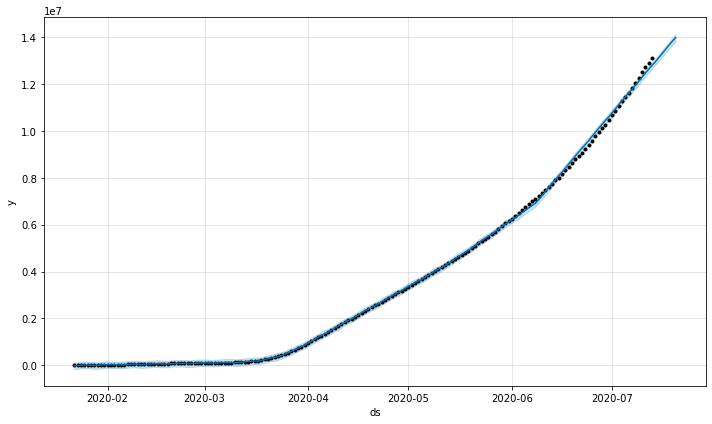

In [104]:
confirmed_forecast_plot = confirm_prophet.plot(confirm_forecast)

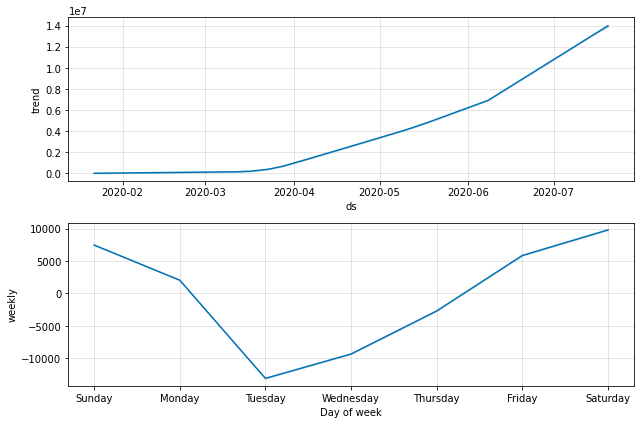

In [105]:
confirmed_forecast_plot_component = confirm_prophet.plot_components(confirm_forecast)

## Model for predicting Deaths Cases (Globally)

In [106]:
death_df.columns = ['ds','y']
death_df['ds'] = pd.to_datetime(death_df['ds'])

# Model with same parameter
death_prophet_model = Prophet(interval_width=0.95)
death_prophet_model.fit(death_df)

# To predict next 7 days value
death_future = death_prophet_model.make_future_dataframe(periods=7)
death_future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
176,2020-07-16
177,2020-07-17
178,2020-07-18
179,2020-07-19
180,2020-07-20


In [107]:
death_forecast = death_prophet_model.predict(death_future)
death_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2020-07-16,587961.483844,586242.130011,589737.517838
177,2020-07-17,593098.369783,590935.974532,595852.689292
178,2020-07-18,597662.489212,594683.705430,600906.627140
179,2020-07-19,601541.377676,597530.840624,605865.780383
180,2020-07-20,605609.150056,600731.990932,610668.184344


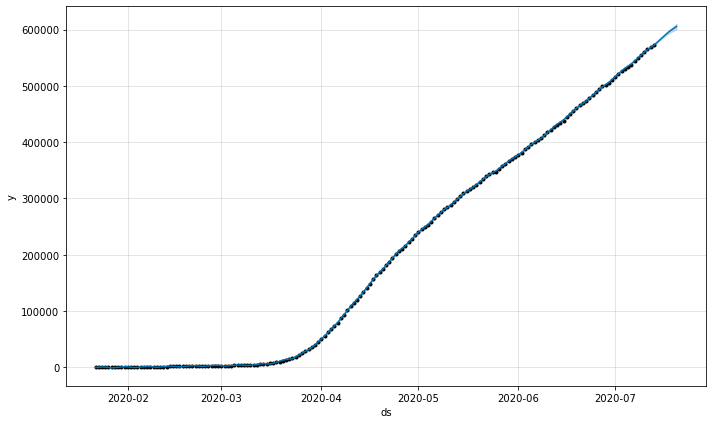

In [108]:
deaths_forecast_plot = death_prophet_model.plot(death_forecast)

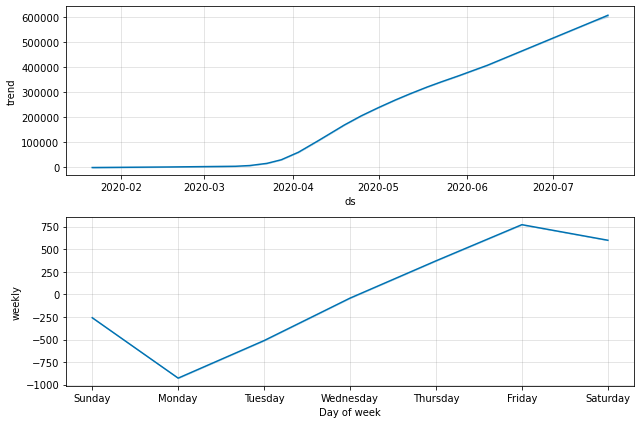

In [109]:
deaths_forecast_plot_component = death_prophet_model.plot_components(death_forecast)

## Model for predicting Recovered Cases (Globally)

In [110]:
recover_df.columns = ['ds','y']
recover_df['ds'] = pd.to_datetime(recover_df['ds'])

# Model with same parameter
recovered_prophet_model = Prophet(interval_width=0.95)
recovered_prophet_model.fit(recover_df)

# To predict next 7 days value
recovers_future = recovered_prophet_model.make_future_dataframe(periods=7)
recovers_future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
176,2020-07-16
177,2020-07-17
178,2020-07-18
179,2020-07-19
180,2020-07-20


In [111]:
recovers_forecast = recovered_prophet_model.predict(recovers_future)
recovers_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
176,2020-07-16,7.362227e+06,7.232465e+06,7.487666e+06
177,2020-07-17,7.475832e+06,7.346699e+06,7.612555e+06
178,2020-07-18,7.591423e+06,7.456024e+06,7.714102e+06
179,2020-07-19,7.697403e+06,7.564863e+06,7.832071e+06
180,2020-07-20,7.810058e+06,7.668659e+06,7.956954e+06


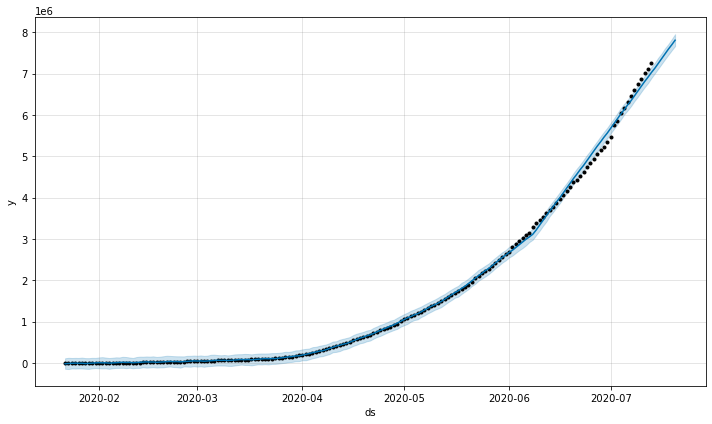

In [112]:
recovers_forecast_plot = recovered_prophet_model.plot(recovers_forecast)

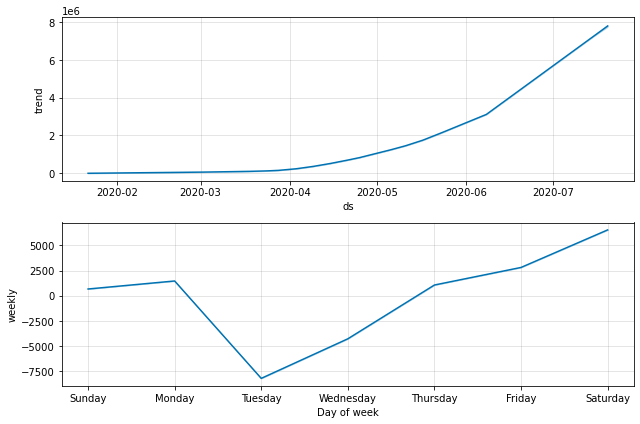

In [113]:
recovers_forecast_plot_component = recovered_prophet_model.plot_components(recovers_forecast)